[View in Colaboratory](https://colab.research.google.com/github/madeleinelee/learning/blob/madeleinelee-patch-1/Copy_of_ex02_learningRate_Selection.ipynb)

## 確認套件已經安裝 & Get data

In [0]:
from __future__ import print_function
!pip install -q keras
import keras
from google.colab import files
import numpy as np
from past.builtins import execfile
import numpy as np
import os

from keras.utils import np_utils
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 請將本機端的資料 "pkgo_city66_cass5_v1.csv" 上傳到 colab 環境

In [0]:
if not os.path.exists("pkgo_city66_class5_v1.csv"):
  uploaded = files.upload()

def readInput(file):
  ''' Read input files '''
  my_data = np.genfromtxt(file, delimiter=',',skip_header=1)

  ''' The first column to the 199th column is used as input features '''
  X_train = my_data[:,0:200]
  X_train = X_train.astype('float32')

  ''' The 200-th column is the answer '''
  y_train = my_data[:,200]
  y_train = y_train.astype('int')

  ''' Convert to one-hot encoding '''
  Y_train = np_utils.to_categorical(y_train,5)

  ''' Shuffle training data '''
  X_train,Y_train = shuffle(X_train,Y_train,random_state=100)
  return X_train, Y_train

X_train, Y_train = readInput(file="pkgo_city66_class5_v1.csv")

## 開始建立第一個模型 
### (資料已經先替各位做過簡單的預處理囉)

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               25728     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
Total para

1652/1652 [==============================] - 0s 125us/step - loss: 1.2399 - acc: 0.5720 - val_loss: 1.5292 - val_acc: 0.5217
Epoch 11/30
1652/1652 [==============================] - 0s 120us/step - loss: 1.2399 - acc: 0.5666 - val_loss: 1.1731 - val_acc: 0.6304
Epoch 12/30
1652/1652 [==============================] - 0s 130us/step - loss: 1.2381 - acc: 0.5533 - val_loss: 1.3471 - val_acc: 0.4728
Epoch 13/30
1652/1652 [==============================] - 0s 129us/step - loss: 1.2286 - acc: 0.5720 - val_loss: 1.3108 - val_acc: 0.3913
Epoch 14/30
1652/1652 [==============================] - 0s 127us/step - loss: 1.2196 - acc: 0.5726 - val_loss: 1.1629 - val_acc: 0.6141
Epoch 15/30
1652/1652 [==============================] - 0s 126us/step - loss: 1.2352 - acc: 0.5732 - val_loss: 1.1981 - val_acc: 0.6141
Epoch 16/30
1652/1652 [==============================] - 0s 124us/step - loss: 1.2146 - acc: 0.5823 - val_loss: 1.2465 - val_acc: 0.5054
Epoch 17/30
1652/1652 [==============================

1652/1652 [==============================] - 0s 126us/step - loss: 1.2071 - acc: 0.5714 - val_loss: 1.3934 - val_acc: 0.5272
Epoch 27/30
1652/1652 [==============================] - 0s 127us/step - loss: 1.2037 - acc: 0.5745 - val_loss: 1.3698 - val_acc: 0.5272
Epoch 28/30
1652/1652 [==============================] - 0s 129us/step - loss: 1.2177 - acc: 0.5684 - val_loss: 1.3039 - val_acc: 0.5109
Epoch 29/30
1652/1652 [==============================] - 0s 128us/step - loss: 1.2181 - acc: 0.5605 - val_loss: 1.4213 - val_acc: 0.3043
Epoch 30/30
1652/1652 [==============================] - 0s 131us/step - loss: 1.2088 - acc: 0.5720 - val_loss: 1.2040 - val_acc: 0.5652


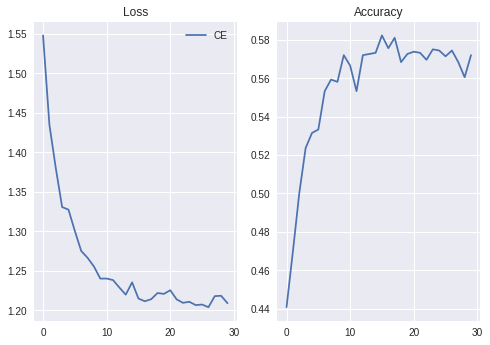

In [0]:
#@title Learning rate selection { vertical-output: true, display-mode: "both" }
learning_rate = 0.1 #@param {type:"raw"}


x_input = Input(shape = [X_train.shape[1]])

x = Dense(128)(x_input)
x = Activation('sigmoid')(x)

x = Dense(256)(x)
x = Activation('sigmoid')(x)

x = Dense(5)(x)
out = Activation('softmax')(x)

sgd = SGD(lr= learning_rate, momentum=0.0,decay=0.0,nesterov=False)

model = Model(inputs=[x_input], outputs=[out])

model.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])
model.summary()

batch_size = 16
epochs = 30

history = model.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							shuffle=True,
              validation_split=0.1)

loss	= history.history.get('loss')
acc 	= history.history.get('acc')

''' Visualize the loss and accuracy of both models'''
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss)), loss,label='CE')
plt.title('Loss')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(range(len(acc)), acc,label='CE')
plt.title('Accuracy')
plt.show()

## 同時比較多種 learning rate 對訓練結果之差異

Running model, lr = 0.1
Running model, lr = 0.01
Running model, lr = 0.001


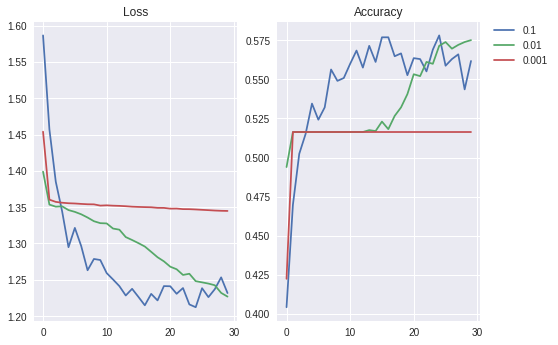

In [0]:
#@title LR Comparison { vertical-output: true, display-mode: "both" }
lr_list = [0.1, 0.01, 0.001] #@param {type:"raw"}

import keras.backend as K
batch_size = 16
epochs = 30
all_loss, all_acc = [], []

for lr in lr_list:
  K.clear_session()
  print("Running model, lr = %s" % lr)
  
  x_input = Input(shape = [X_train.shape[1]])
  x = Dense(128)(x_input)
  x = Activation('sigmoid')(x)

  x = Dense(25x`x`6)(x)
  x = Activation('sigmoid')(x)

  x = Dense(5)(x)
  out = Activation('softmax')(x)

  sgd = SGD(lr=lr,momentum=0.0,decay=0.0,nesterov=False)

  model = Model(inputs=[x_input], outputs=[out])

  model.compile(loss='categorical_crossentropy',
          optimizer=sgd,
          metrics=['accuracy'])

  history = model.fit(X_train, Y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                shuffle=True,
                validation_split=0.1)

  loss	= history.history.get('loss')
  acc 	= history.history.get('acc')
  
  all_loss.append(loss)
  all_acc.append(acc)

''' Visualize the loss and accuracy of both models'''
plt.figure(0)
plt.subplot(121)
for k in range(len(lr_list)):
  plt.plot(range(len(all_loss[k])), all_loss[k],label=lr_list[k])
plt.title('Loss')
plt.subplot(122)
for k in range(len(lr_list)):
  plt.plot(range(len(all_acc[k])), all_acc[k],label=lr_list[k])
plt.title('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()